#### 1 Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from scipy import stats as st

#### 2 Importando as tabelas

In [2]:
df_hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('orders_us.csv')
df_visits = pd.read_csv('visits_us.csv')

#### 3 Limpando os dados

##### 3.1 df_hypotheses

In [3]:
# Visualizando os dados
print(df_hypotheses.head())
df_hypotheses.info()

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ 

In [4]:
# Ajustando para snake_case
df_hypotheses.columns = df_hypotheses.columns.str.replace(' ', '_').str.lower()

df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


##### 3.2 df_orders

In [5]:
# Visualizando os dados
print(df_orders.head())
df_orders.info()

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [6]:
# Alterando os tipos de dados
df_orders['group'] = df_orders['group'].astype('category').cat.as_ordered()
df_orders['date'] = pd.to_datetime(df_orders['date'])

# Ajustando para snake_case
df_orders.columns = df_orders.columns.str.replace(' ', '_').str.lower()

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


In [7]:
# Encontrando os visitantes que apareceram nos dois grupos
ocorrencias_visitorid = df_orders.groupby('visitorid')['group'].nunique().sort_values(ascending=False).reset_index()
visitors_AB = ocorrencias_visitorid[ocorrencias_visitorid['group'] == 2]

# Retirando esses visitantes do df_orders
df_orders = df_orders[~df_orders['visitorid'].isin(visitors_AB['visitorid'])]

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 40.8 KB


##### 3.3 df_visits

In [8]:
# Visualizando os dados
print(df_visits.head())
print(df_visits.info())

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [9]:
# Alterando os tipos de dados
df_visits['group'] = df_visits['group'].astype('category').cat.as_ordered()
df_visits['date'] = pd.to_datetime(df_visits['date'])

# Ajustando para snake_case
df_visits.columns = df_visits.columns.str.replace(' ', '_').str.lower()

df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB


#### 4 Priorizando hipóteses

##### 4.1 Aplicando o framework ICE

In [10]:
df_hypotheses['ICE'] = (df_hypotheses['impact']*df_hypotheses['confidence'])/df_hypotheses['effort']
print(df_hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


##### 4.2 Aplicando o framework RICE

In [11]:
df_hypotheses['RICE'] = (df_hypotheses['reach']*df_hypotheses['impact']*df_hypotheses['confidence'])/df_hypotheses['effort']
print(df_hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


A este ponto, vemos como o parâmetro de alcance (Reach) impacta a prioridade das hipóteses. Por conta do alcance da hipótese "Add a subscription form to all the main pages. This will help you compile a mailing list", vemos como ela ultrapassa em muito as demais.

Concluindo, a hipótese que vamos avaliar a seguir no teste A/B é: Add a subscription form to all the main pages. This will help you compile a mailing list.

#### 5 Análise de teste A/B

##### 5.1 Gráfico da receita acumulada por grupo

In [12]:
# Vetor dos pares unívocos de date e group
dateGroups = df_orders[['date','group']].drop_duplicates()
dateGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [13]:
# Obtendo os dados cumulativos
ordersAgg = (dateGroups.apply(
    lambda x: df_orders[np.logical_and(df_orders['date']<=x['date'], df_orders['group']==x['group'])]
    .agg({'date':'max','group':'max','transactionid':'nunique','visitorid':'nunique','revenue':'sum'})
    , axis=1)
    .sort_values(['date','group'])
)
ordersAgg.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

ordersAgg

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


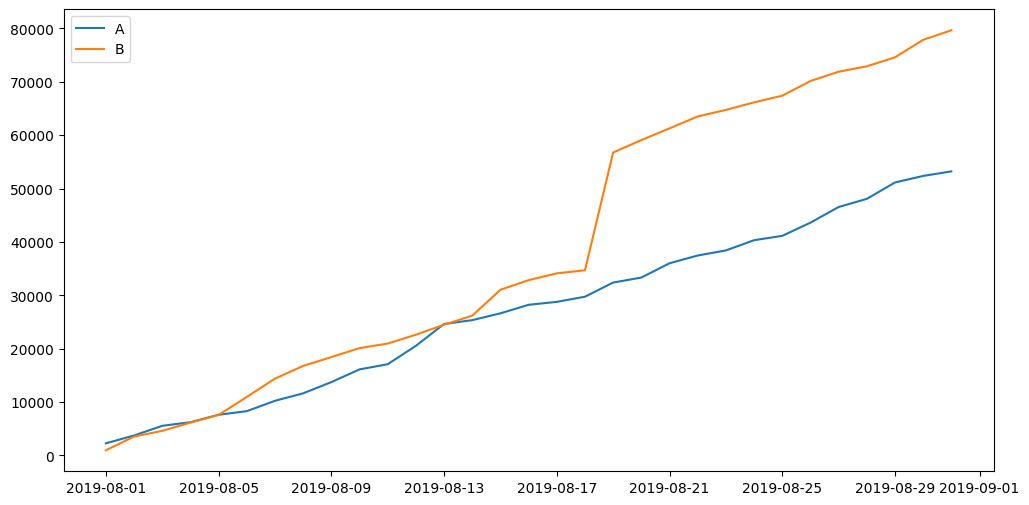

In [14]:
# Separando o df por grupo
ordersAgg_A = ordersAgg[ordersAgg['group']=='A'][['date','group','revenue']]
ordersAgg_B = ordersAgg[ordersAgg['group']=='B'][['date','group','revenue']]

# Gráfico da receita acumulada por grupo
plt.figure(figsize=(12, 6))
plt.plot(ordersAgg_A['date'],ordersAgg_A['revenue'],label='A')
plt.plot(ordersAgg_B['date'],ordersAgg_B['revenue'],label='B')
plt.legend()
plt.show()

A receita apresenta um crescimento estável em ambos os grupos, mas no grupo "B", vemos um pico de receita por volta dos dias 19 e 20, mas vamos seguir analisando os dados para identificar com exatidão o que isso significa.

##### 5.2 Gráfico do ticket médio acumulado por grupo

In [15]:
# Obtendo os dados cumulativos das visitas
visitorsAgg = dateGroups.apply(
    lambda x: df_visits[
        np.logical_and(
            df_visits['date'] <= x['date'], df_visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAgg

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [16]:
# Mesclando os dados agregados
cumulativeData = ordersAgg.merge(
    visitorsAgg, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


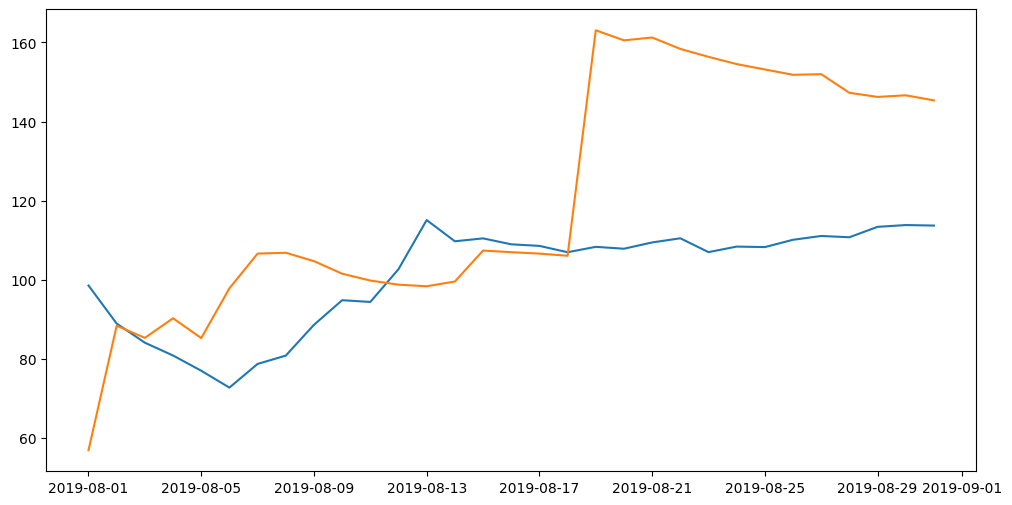

In [17]:
# Separando o df por grupo
cumulativeData_A = cumulativeData[cumulativeData['group']=='A'][['date','orders','revenue']]
cumulativeData_B = cumulativeData[cumulativeData['group']=='B'][['date','orders','revenue']]

# Gráfico do ticket médio acumulado por grupo
plt.figure(figsize=(12, 6))
plt.plot(cumulativeData_A['date'],cumulativeData_A['revenue']/cumulativeData_A['orders'],label='A')
plt.plot(cumulativeData_B['date'],cumulativeData_B['revenue']/cumulativeData_B['orders'],label='B')

plt.show()

Visualizando o gráfico cumulativo do ticket médio, podemos observar o mesmo pico de receita do grupo "B" seguido por uma queda desse indicador nos dias seguintes, enquanto que o grupo "A" teve seu pico nos primeiros dias do teste mas depois estabilizou.

##### 5.3 Gráfico da diferença relativa no ticket médio acumulado para o grupo B em comparação com o grupo A

In [18]:
# Mesclando os dados dos grupos separados
cumulativeMerge = cumulativeData_A.merge(cumulativeData_B, on=['date'], suffixes=['_A','_B'])

cumulativeMerge

,date,orders_A,revenue_A,orders_B,revenue_B
0,2019-08-01,23,2266.6,17,967.2
1,2019-08-02,42,3734.9,40,3535.3
2,2019-08-03,66,5550.1,54,4606.9
3,2019-08-04,77,6225.6,68,6138.5
4,2019-08-05,99,7623.6,89,7587.8
5,2019-08-06,114,8292.0,112,10957.1
6,2019-08-07,130,10234.0,135,14392.7
7,2019-08-08,144,11638.8,157,16772.6
8,2019-08-09,155,13734.0,176,18428.8
9,2019-08-10,170,16121.5,198,20103.6


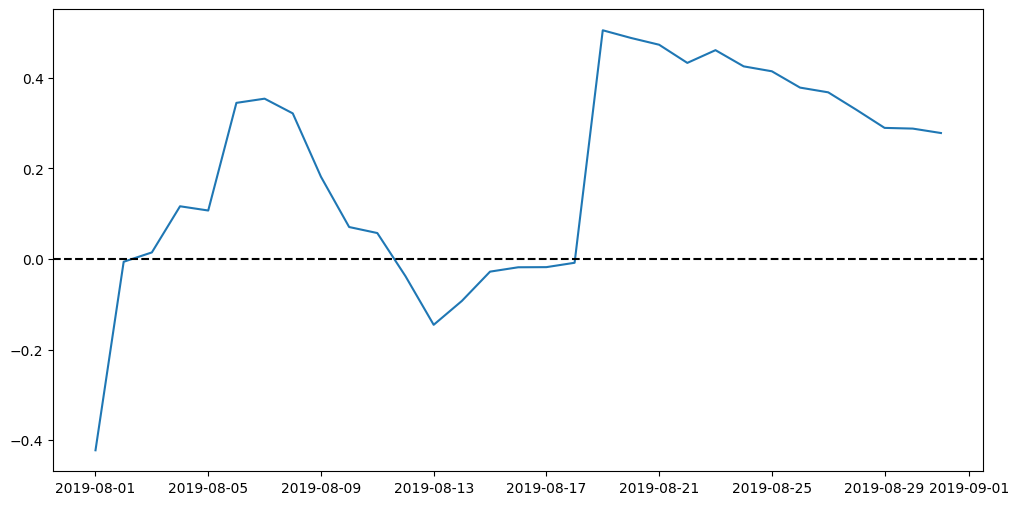

In [19]:
# Gráfico da diferença relativa acumulada
plt.figure(figsize=(12, 6))
plt.plot(cumulativeMerge['date'],(cumulativeMerge['revenue_B']/cumulativeMerge['orders_B'])/(cumulativeMerge['revenue_A']/cumulativeMerge['orders_A'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Em vários pontos, a diferença relativa apresenta picos, isso indica a ocorrência de valores atípicos. No fim a diferença sofre leve queda, mas vamos seguir avaliando.

##### 5.4 Taxa de conversão cumulativa de cada grupo

In [20]:
# Criando a coluna da conversão
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708,0.028801
58,2019-08-30,A,460,437,52363.7,18037,0.025503
59,2019-08-30,B,531,511,77863.5,18198,0.029179
60,2019-08-31,A,468,445,53212.0,18736,0.024979


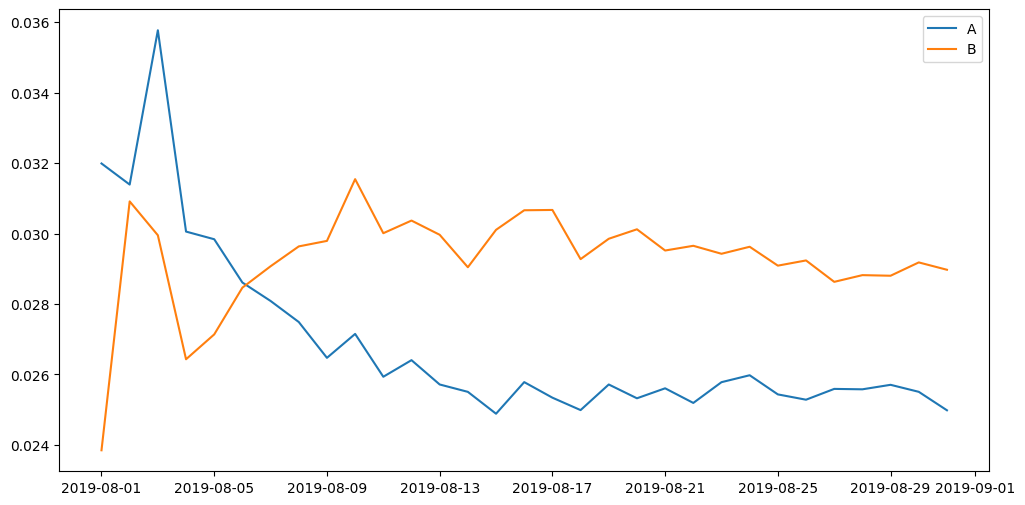

In [21]:
# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','conversion']]

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','conversion']]

# construindo os gráficos
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


Neste gráfico das conversões cumulativas fica mais claro que houveram grandes oscilações no início do teste, mas posteriormente o grupo "A" sofreu forte queda, e o grupo "B" subiu, e os grupos se estabilizaram com certa diferença que veremos a seguir.

##### 5.5 Gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A

In [22]:
# Unindo os dados para calcular a diferença relativa
cumulativeMerge = cumulativeDataA.merge(cumulativeDataB, on=['date'], how='left', suffixes=['_A','_B'])

cumulativeMerge

,date,conversion_A,conversion_B
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134
5,2019-08-06,0.028607,0.028463
6,2019-08-07,0.028084,0.029070
7,2019-08-08,0.027486,0.029634
8,2019-08-09,0.026469,0.029790
9,2019-08-10,0.027148,0.031544


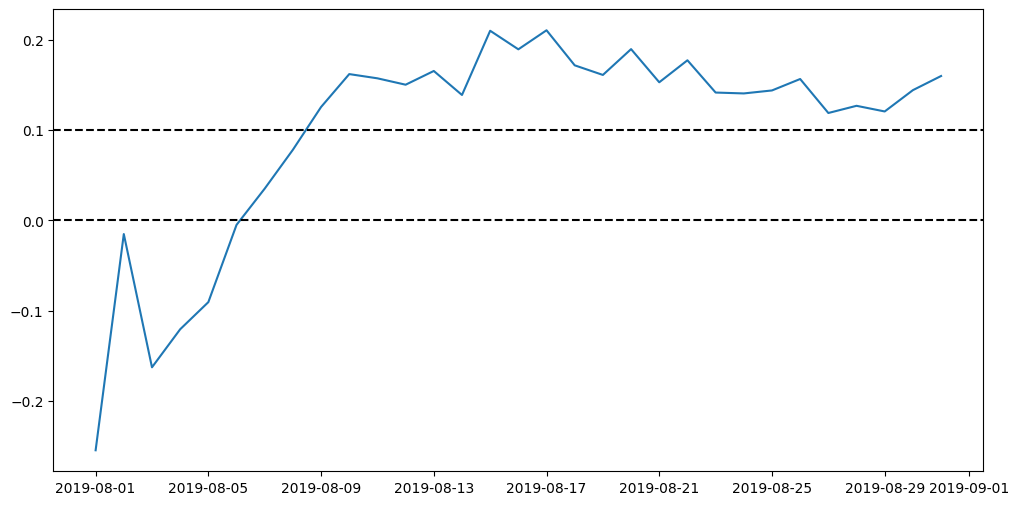

In [23]:
# Gráfico da diferença relativa acumulada
plt.figure(figsize=(12, 6))
plt.plot(cumulativeMerge['date'],cumulativeMerge['conversion_B']/cumulativeMerge['conversion_A']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.show()

No gráfico da diferença relativa, vemos como a conversão do grupo "B" realmente se estabiliza em um nível superior, com um valor acima de 0.1 para a diferença relativa.

##### 5.6 Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [24]:
# Agrupando os pedidos por user
ordersByUsers = df_orders.groupby(['visitorid'], as_index=False).agg({'transactionid':'nunique'})
ordersByUsers.columns = ['userid', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False)

,userid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


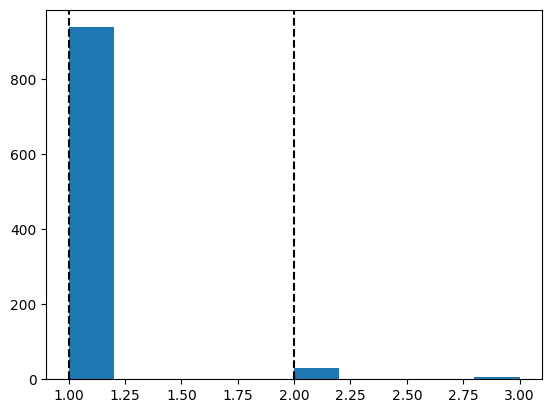

In [25]:
# Plotando um histograma de distribuição para a quantidade de pedidos por usuário
plt.hist(ordersByUsers['orders'])
plt.axvline(x=np.percentile(ordersByUsers['orders'], [99]), color='black', linestyle='--')
plt.axvline(x=np.percentile(ordersByUsers['orders'], [95]), color='black', linestyle='--')

In [26]:
# Definindo os pencentis 95 e 99
print('Os pencentis 95 e 99 são, respectivamente:',np.percentile(ordersByUsers['orders'], [95, 99]))

Os pencentis 95 e 99 são, respectivamente: [1. 2.]


A partir dos dados observados vamos definir como sendo dados anômalos o percentil 99, e isso corresponde a 2 pedidos por usuário.

##### 5.7 Gráfico de dispersão dos preços dos pedidos.

(0.0, 4000.0)

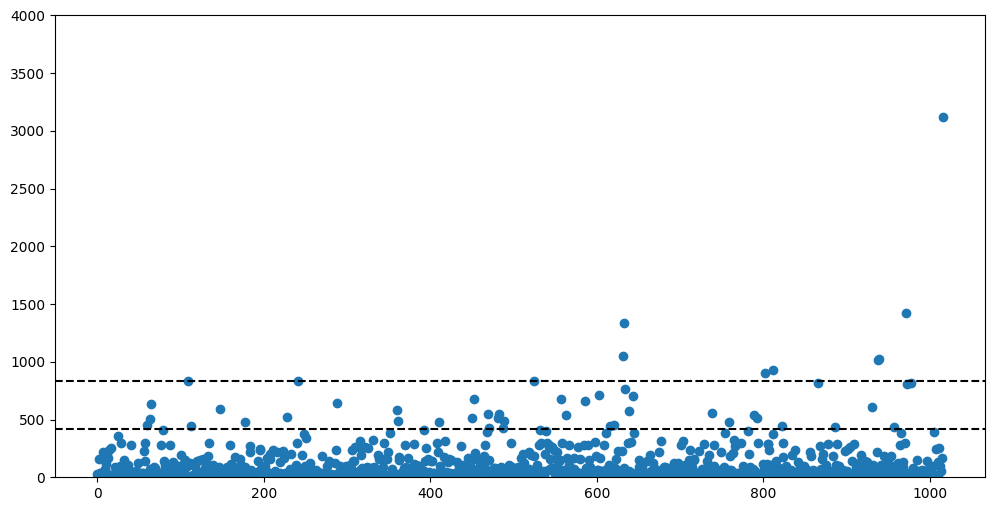

In [27]:
# Criando o eixo x
x_values = pd.Series(range(0,len(df_orders['revenue'])))

# Criando o gráico de dispersão
plt.figure(figsize=[12,6])
plt.scatter(x_values, df_orders['revenue'])
plt.axhline(y=np.percentile(df_orders['revenue'], [99]), color='black', linestyle='--')
plt.axhline(y=np.percentile(df_orders['revenue'], [95]), color='black', linestyle='--')
plt.ylim(0, 4000)

No gráfico, foi exposta a dispersão dos dados dos preços dos pedidos, com as linhas pontilhadas demarcando os percentis 95 e 99. Aqui vemos alguns valores inclusive bem acima dos 99%.

##### 5.8 Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.

In [28]:
# Definindo os pencentis 95 e 99
print('Os pencentis 95 e 99 são, respectivamente:',np.percentile(df_orders['revenue'], [95, 99]))

Os pencentis 95 e 99 são, respectivamente: [414.275 830.3  ]


A partir dos dados observados vamos definir como sendo dados anômalos valores próximos do percentil 99, então podemos considerar pedidos anômalos aqueles que possuem um valor maior do que $ 800.

A seguir serão realizados testes de significância, e será utilizado nas análises o teste não paramético Mann-Whitney

Definindo as hipóteses e o alpha para todos os testes:

Hipótese H0: As amostras não são significativamente diferentes   
Hipótese H1: As amostras são estatisticamente diferentes
alpha = 0,05

##### 5.9 Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos.

In [29]:
# Definindo a quantidade de pedidos por user
ordersByUsersA = df_orders[df_orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = df_orders[df_orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

# Definindo a quantidade de pedidos por user incluindo os zeros
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()
                                                   - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum()
                                                   - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [30]:
# Calculando a significancia estatística
print('O p-value da diferença entre os grupos:',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

# Calculando a diferença relativa
print('A diferença relativa na conversão entre os grupos é:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

O p-value da diferença entre os grupos: 0.01102
A diferença relativa na conversão entre os grupos é: 0.160


A partir dos cálculos acima, vemos que o p-value obtido é inferior ao alpha de 0,05 o que significa que podemos rejeitar a hipótese nula e afirmar que as amostras são significativamente diferentes em relação ao número de pedidos. Além disso, a diferença relativa da taxa de conversão dos dois grupos foi de 16%.

##### 5.10 Encontre a significância estatística da diferença no ticktet médio entre os grupos usando os dados brutos.

In [31]:
# Calculando a significância da diferença dos pedidos
print('A significância estatística da diferença das vendas é:',
      '{0:.2f}'.format(st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue']
                                       , df_orders[df_orders['group']=='B']['revenue'])[1]))

# Calculando a diferença relativa do ticket médio
print('A diferença relativa no tamanho médio dos pedidos é:',
      '{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()
                       /df_orders[df_orders['group']=='A']['revenue'].mean()-1))

A significância estatística da diferença das vendas é: 0.86
A diferença relativa no tamanho médio dos pedidos é: 0.278


Em relação às vendas, vemos que o p-value obtido é superior a um alpha de 0,05 o que significa que não é possível rejeitar a hipótese de que as amostras não são significativamente diferentes. Em relação a diferença relativa do volume médio dos pedidos nos dois grupos, vemos um aumento de 27,8% do grupo "B" em relação ao "A".

##### 5.11 Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados.

In [32]:
# Descobrindo os usuários com muitos pedidos
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 4]['userid'],
                                  ordersByUsersB[ordersByUsersB['orders'] >= 4]['userid']],
                                    axis = 0)

# Descobrindo pedidos com valores altos
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 900]['visitorid']

# Identificando todos os anômalos
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
940     4003628586
743     4133034833
dtype: int64

In [33]:
# Filtrando os dados
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()
                                                           - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum()
                                                           - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# Calculando a significancia estatística
print('O p-value da diferença entre os grupos:',
      "{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# Calculando a diferença relativa
print('A diferença relativa na conversão entre os grupos é:',
      "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

O p-value da diferença entre os grupos: 0.00969
A diferença relativa na conversão entre os grupos é: 0.164


Aqui vemos que o p-value obtido é inferior ao alpha de 0,05 o que significa que ainda rejeitamos a hipótese nula e afirmamos que as amostras são significativamente diferentes. Além disso, a diferença relativa da taxa de conversão dos dois grupos foi de 16,4%, enquanto que para os dados brutos era de 16%.

##### 5.12 Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados.

In [34]:
print('A significância estatística da diferença das vendas é:','{0:.3f}'.format(st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('A diferença relativa no tamanho médio dos pedidos é:','{0:.3f}'.format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

A significância estatística da diferença das vendas é: 0.934
A diferença relativa no tamanho médio dos pedidos é: -0.031


Em relação a diferença do tamanho médio dos pedidos, vemos que o p-value obtido segue muito superior a um alpha de 0,05 o que significa que não é possível rejeitar a hipótese nula de que as amostras não são significativamente diferentes. Porém, em relação a diferença relativa do volume médio dos pedidos nos dois grupos, vemos uma queda de 3,1% do grupo "B" em relação ao "A", que antes era um aumento de 27,8%.

##### 5.13 Decisões finais do teste

Avaliando os resultados como um todo, podemos destacar que, em geral, os dados brutos e filtrados foram bastante similares, com exceção do tamanho médio dos pedidos, que antes mostrava um aumento de mais de 25% no grupo "B" em relação ao grupo "A", mas depois, com os dados filtrados, demonstrou pouca diferença.

As conclusões que podemos retirar da avaliação dos indicadores é a de que o grupo B teve um aumento significativo no volume de pedidos e na taxa de conversão em relação ao grupo A. Mas ao mesmo tempo, a venda não demonstrou uma diferença significativa.